# Mesh
* read mesh file
* plot mesh 
* convert to shapely
* check if point is inside or outside mesh
* subset mesh, plot subset
* change z values
* change boundary codes

In [35]:
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams["figure.figsize"] = (6,6)

import mikeio

In [36]:
msh = mikeio.Mesh("../tests/testdata/odense_rough.mesh")
msh

<Mesh>
number of elements: 654
number of nodes: 399
projection: UTM-33

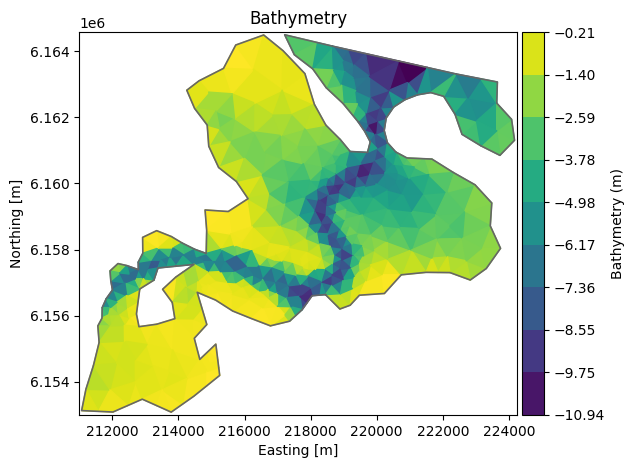

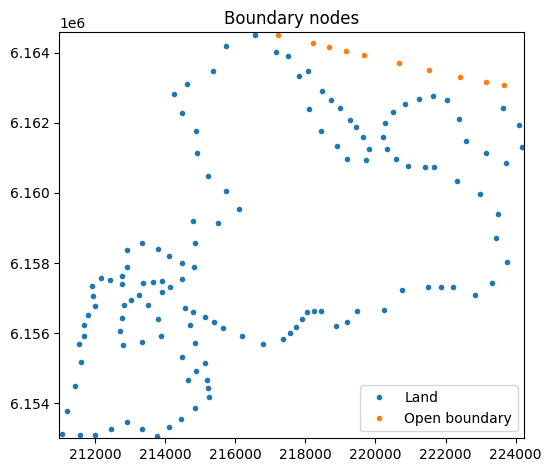

In [37]:
msh.plot()
msh.plot.boundary_nodes(boundary_names=['Land','Open boundary']);

# Convert mesh to shapely
Convert mesh to [shapely](https://shapely.readthedocs.io/en/latest/manual.html) MultiPolygon object, requires that the `shapely` library is installed.

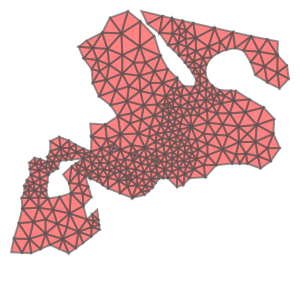

In [38]:
mp = msh.to_shapely()
mp

Now a lot of methods are available

In [39]:
mp.area

68931409.58160606

In [40]:
mp.bounds

(211068.501175313, 6153077.66681803, 224171.617336507, 6164499.42751662)

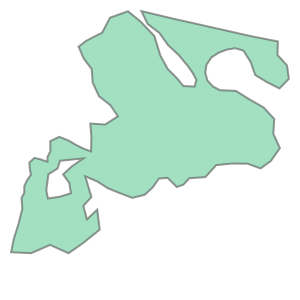

In [41]:
domain = mp.buffer(0)
domain

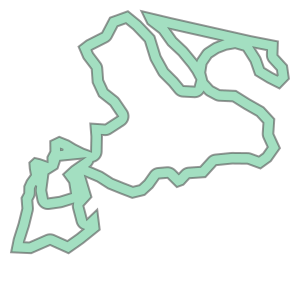

In [42]:
open_water = domain.buffer(-500)

coastalzone = domain - open_water
coastalzone

Find if points are inside the domain

In [43]:
from shapely.geometry import Point

p1 = Point(216000, 6162000)
p2 = Point(220000, 6156000)
print(mp.contains(p1))
print(mp.contains(p2))

True
False


## Mesh class can also check if a mesh contains points 

In [44]:
p1p2 = [[216000, 6162000], [220000, 6156000]]
msh.geometry.contains(p1p2)

array([ True, False])

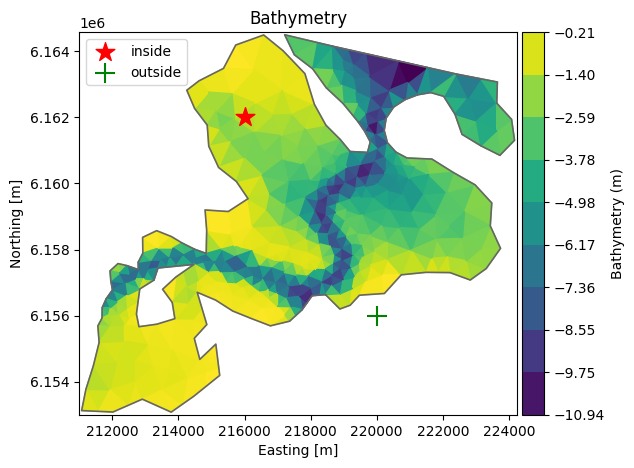

In [45]:
ax = msh.plot()
ax.scatter(p1.x, p1.y, marker="*", s=200, c="red", label="inside")
ax.scatter(p2.x, p2.y, marker="+", s=200, c="green", label="outside")
ax.legend();

# Subset mesh
Select only elements with more than 3m depth. Plot these elements. 

In [46]:
zc = msh.element_coordinates[:,2]

# Change z values and boundary code
Assume that we want to have a minimum depth of 2 meters and change the open boundary (code 2) to a closed one (code 1). 

In [47]:
print(f'max z before: {msh.node_coordinates[:,2].max()}')
zc = msh.node_coordinates[:,2]
zc[zc>-2] = -2
msh.zn = zc
print(f'max z after: {msh.node_coordinates[:,2].max()}')

max z before: -0.200000002980232
max z after: -2.0


In [48]:
c = msh.geometry.codes
c[c==2] = 1
msh.geometry.codes = c

In [49]:
msh.geometry.codes

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,